In [1]:
#import necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [36]:
# Load the Google stock prices dataset

df=pd.read_csv('../Google_Stock_Price_Train.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [37]:
# Extract Open prices

prices=df['Open'].values
prices

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

In [38]:
prices=prices.reshape(-1,1)
prices

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [39]:
# Normalize the prices using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)
prices_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [40]:
# Split the data into train and test sets (80% train, 20% test)
train_size=int(len(prices_scaled)*0.8) 
test_size=len(prices_scaled)-train_size
train_data=prices_scaled[0:train_size]
test_data=prices_scaled[train_size:len(prices_scaled)]


In [45]:
# Function to create X and y datasets from time series data

def create_dataset(dataset,time_step):
    X,y=[],[]
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step),0])
        y.append(dataset[i+time_step,0])
    return np.array(X),np.array(y)


In [46]:

# Define the time step for sequence prediction
time_step=60

# Create the X and y datasets
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [47]:
# Reshape the input data to be 3D (batch_size, time_step, features)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [50]:
# Build the RNN model
model=Sequential([
    LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)),
    LSTM(units=50,return_sequences=True),
    LSTM(units=50),
    Dense(units=1)
])

c:\Users\Ashutosh Khairnar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
# compile model
model.compile(
  loss='mean_squared_error',
  optimizer='adam',
)


In [56]:
# Train the model
model.fit(x_train, y_train, epochs=30, batch_size=64)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0993
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0102
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0027
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0015
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0015
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0014
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0014
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0014
Epoch 9/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0015
Epoch 10/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0012
Epoch 11/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0015
Epoch 12/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0015
Epoch 13/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0014
Epoch 14/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0012
Epoch 15/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0013
Epoc

In [57]:
# Predictions
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


In [58]:
# Inverse scaling to get actual prices
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])

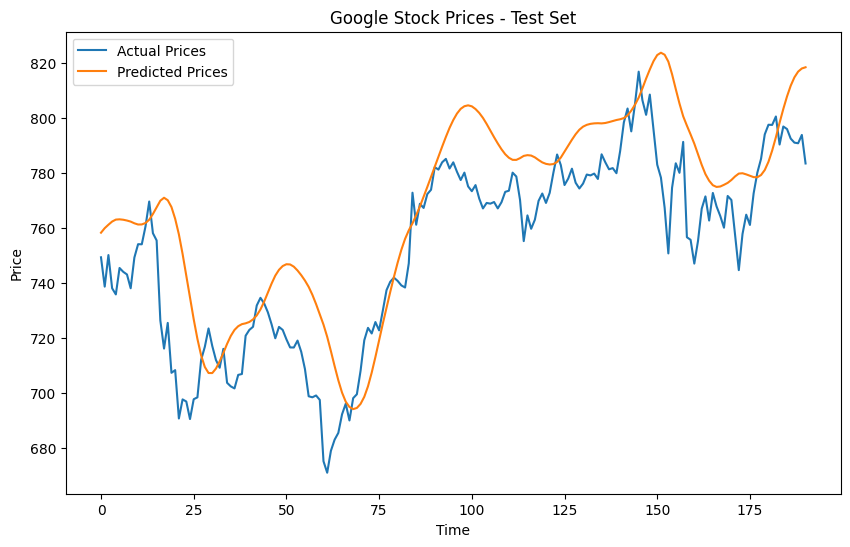

In [67]:
# Plot the test predictions vs. actual prices
plt.figure(figsize=(10,6))
plt.plot(y_test.flatten(), label='Actual Prices')
plt.plot(y_pred.flatten(), label='Predicted Prices')
plt.title('Google Stock Prices - Test Set')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()